In [2]:
import pandas as pd

file_path = "../data/output_data/top60_final_merged_y_close.csv"
df = pd.read_csv(file_path,index_col="Date", parse_dates=["Date"])

In [3]:
import numpy as np

# 1. 'y_target'에 로그 변환을 적용하여 'y_target_log' 생성
df['y_target_log'] = np.log(df['y_target'])

# 2. 타겟(y) 정의
y = df['y_target_log']

# 3. X 정의 (모든 피처 포함)
X = df.drop(columns=['y_target', 'y_target_log'])

In [4]:
def auto_log_transform_by_value(df):
    """
    데이터프레임(df)을 입력받아 숫자형 변수의 값 범위에 따라
    로그 변환(log 또는 log1p)을 자동으로 수행합니다.

    - 음수 값이 포함된 열은 변환하지 않습니다.
    - 0과 1 사이의 값(0 포함)이 포함된 열은 log1p (log(x+1)) 변환을 사용합니다.
    - 모든 값이 1 이상인 열은 log (log(x)) 변환을 사용합니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임

    Returns:
        pd.DataFrame: 변환된 데이터프레임
        list: 변환이 적용된 열의 이름 리스트
    """

    print(f"--- 자동 로그 변환 시작 (값 범위 기반) ---")

    # 원본 수정을 방지하기 위해 데이터프레임 복사
    df_transformed = df.copy()
    transformed_cols = []

    # 숫자형(numeric) 열만 선택
    numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_data = df_transformed[col]
        col_min = col_data.min()

        # 1. NaN 값은 변환 전에 제외하고 최소값을 계산 (pandas의 .min() 기본 동작)
        # 만약 NaN을 0으로 간주하고 싶다면, .fillna(0).min()을 사용할 수 있습니다.

        # 2. 음수 값 확인
        if col_min < 0:
            print(f"[{col}] 건너뜀: 음수 값이 포함되어 있습니다. (최소값: {col_min:.2f})")
            continue

        # 3. 0 또는 1 미만의 양수 값 확인 (log1p 대상)
        elif col_min < 1:
            # 0이 포함되거나 (col_min == 0), 0과 1 사이의 값이 포함된 경우 (0 < col_min < 1)
            # log(x+1) 변환 적용
            df_transformed[col] = np.log1p(col_data)
            transformed_cols.append(col)
            print(f"[{col}] 변환 적용 (log1p): 최소값={col_min:.2f} (< 1)")

        # 4. 모든 값이 1 이상인 경우 (log 대상)
        else: # col_min >= 1
            # log(x) 변환 적용
            df_transformed[col] = np.log(col_data)
            transformed_cols.append(col)
            print(f"[{col}] 변환 적용 (log): 최소값={col_min:.2f} (>= 1)")


    print(f"--- 총 {len(transformed_cols)}개 열 변환 완료 ---")

    return df_transformed, transformed_cols

In [5]:
X_transformed, transformed_list = auto_log_transform_by_value(X)
print(X_transformed[transformed_list].skew())

--- 자동 로그 변환 시작 (값 범위 기반) ---
[High] 변환 적용 (log): 최소값=159.27 (>= 1)
[Low] 변환 적용 (log): 최소값=155.42 (>= 1)
[Volume] 변환 적용 (log): 최소값=8926090.00 (>= 1)
[Close] 변환 적용 (log): 최소값=156.14 (>= 1)
[Volatility] 변환 적용 (log): 최소값=1.92 (>= 1)
[DX-Y.NYB_Close] 변환 적용 (log): 최소값=96.63 (>= 1)
[GC=F_Close] 변환 적용 (log): 최소값=1676.50 (>= 1)
[GLD_Close] 변환 적용 (log): 최소값=155.85 (>= 1)
[SHY_Close] 변환 적용 (log): 최소값=80.51 (>= 1)
[TLT_Close] 변환 적용 (log): 최소값=82.77 (>= 1)
[^VIX_Close] 변환 적용 (log): 최소값=11.86 (>= 1)
[GC=F_Volume] 변환 적용 (log1p): 최소값=0.00 (< 1)
[GLD_Volume] 변환 적용 (log): 최소값=1436500.00 (>= 1)
[SHY_Volume] 변환 적용 (log): 최소값=1272200.00 (>= 1)
[TLT_Volume] 변환 적용 (log): 최소값=9486100.00 (>= 1)
[^VIX_Volatility] 변환 적용 (log1p): 최소값=0.24 (< 1)
[DX-Y.NYB_Volatility] 변환 적용 (log1p): 최소값=0.19 (< 1)
[TLT_Volatility] 변환 적용 (log1p): 최소값=0.24 (< 1)
[GC=F_Volatility] 변환 적용 (log1p): 최소값=0.00 (< 1)
[GLD_Volatility] 변환 적용 (log1p): 최소값=0.44 (< 1)
[SHY_Volatility] 변환 적용 (log1p): 최소값=0.02 (< 1)
[WTI_Spot] 변환 적용 (log): 최소값=58.

In [6]:
df.head()

,High,Low,Volume,Close,Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,...,PCR(배),SPS(달러),DPS(달러),EPS(달러),BPS(달러),CPS(달러),ROA(%),ROIC(%),y_target,y_target_log
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,159.266873,155.416743,2.422511e+07,158.288672,3.850129,110.120003,1676.500000,155.850006,80.610001,93.279999,...,29.772373,55.195254,2.177966,6.40678,38.125593,12.635254,8.8,17.843103,379.950012,5.940040
2022-11-08,161.183501,157.012456,2.774416e+07,159.389651,4.171045,109.620003,1712.099976,159.449997,80.690002,94.300003,...,29.772373,55.195254,2.177966,6.40678,38.125593,12.635254,8.8,17.843103,382.000000,5.945421
2022-11-09,159.729943,155.755290,2.600689e+07,156.143013,3.974652,110.550003,1710.099976,158.649994,80.820000,94.610001,...,29.772373,55.195254,2.177966,6.40678,38.125593,12.635254,8.8,17.843103,374.130005,5.924603
2022-11-10,165.475252,159.964003,3.690776e+07,164.653242,5.511249,108.209999,1750.300049,163.479996,81.260002,98.250000,...,29.772373,55.195254,2.177966,6.40678,38.125593,12.635254,8.8,17.843103,394.690002,5.978101
2022-11-11,168.213936,162.340353,3.221336e+07,165.934455,5.873583,106.290001,1766.000000,164.559998,81.239998,97.889999,...,29.772373,55.195254,2.177966,6.40678,38.125593,12.635254,8.8,17.843103,398.510010,5.987733


In [7]:
X_transformed['y_target_log'] = df['y_target_log']

In [8]:
X_transformed.head()

,High,Low,Volume,Close,Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,...,PBR(배),PCR(배),SPS(달러),DPS(달러),EPS(달러),BPS(달러),CPS(달러),ROA(%),ROIC(%),y_target_log
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,5.070581,5.046110,17.002900,5.064420,1.348107,4.701571,7.424464,5.048894,4.389623,4.535606,...,2.454816,3.393581,4.010877,0.778391,1.857357,3.640886,2.536491,2.174752,2.881617,5.940040
2022-11-08,5.082543,5.056325,17.138536,5.071352,1.428167,4.697020,7.445476,5.071730,4.390615,4.546481,...,2.454816,3.393581,4.010877,0.778391,1.857357,3.640886,2.536491,2.174752,2.881617,5.945421
2022-11-09,5.073485,5.048286,17.073872,5.050772,1.379937,4.705468,7.444307,5.066700,4.392224,4.549763,...,2.454816,3.393581,4.010877,0.778391,1.857357,3.640886,2.536491,2.174752,2.881617,5.924603
2022-11-10,5.108822,5.074949,17.423932,5.103842,1.706791,4.684074,7.467543,5.096691,4.397654,4.587515,...,2.454816,3.393581,4.010877,0.778391,1.857357,3.640886,2.536491,2.174752,2.881617,5.978101
2022-11-11,5.125237,5.089695,17.287892,5.111593,1.770465,4.666171,7.476472,5.103275,4.397408,4.583844,...,2.454816,3.393581,4.010877,0.778391,1.857357,3.640886,2.536491,2.174752,2.881617,5.987733


In [9]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2022-11-07 to 2025-11-07
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High                 754 non-null    float64
 1   Low                  754 non-null    float64
 2   Volume               754 non-null    float64
 3   Close                754 non-null    float64
 4   Volatility           754 non-null    float64
 5   DX-Y.NYB_Close       754 non-null    float64
 6   GC=F_Close           754 non-null    float64
 7   GLD_Close            754 non-null    float64
 8   SHY_Close            754 non-null    float64
 9   TLT_Close            754 non-null    float64
 10  ^VIX_Close           754 non-null    float64
 11  GC=F_Volume          754 non-null    float64
 12  GLD_Volume           754 non-null    float64
 13  SHY_Volume           754 non-null    float64
 14  TLT_Volume           754 non-null    float64
 15  ^VIX_Volatility      

In [10]:
X_transformed.describe()

,High,Low,Volume,Close,Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,...,PBR(배),PCR(배),SPS(달러),DPS(달러),EPS(달러),BPS(달러),CPS(달러),ROA(%),ROIC(%),y_target_log
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,...,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,5.446668,5.424818,16.893147,5.436263,1.577010,4.635661,7.784983,5.405167,4.405600,4.542954,...,2.718622,3.229970,4.116221,0.945753,2.048483,3.766134,2.113792,2.313768,3.057984,6.231434
std,0.213099,0.212316,0.220543,0.212630,0.348162,0.027958,0.235091,0.231809,0.008101,0.067373,...,0.216509,0.131259,0.067933,0.109981,0.157070,0.076481,0.274729,0.134742,0.134112,0.167137
min,5.070581,5.046110,16.004489,5.050772,0.654774,4.570889,7.424464,5.048894,4.388381,4.416066,...,2.416663,2.979095,4.010877,0.778391,1.774924,3.640886,1.407467,2.085777,2.810729,5.924603
25%,5.248726,5.229358,16.750670,5.238859,1.311083,4.618851,7.581898,5.204831,4.398300,4.488412,...,2.594961,3.116592,4.062250,0.829440,1.936593,3.708649,1.949246,2.182947,2.936018,6.078599
50%,5.480026,5.459542,16.887767,5.470748,1.537318,4.639861,7.753044,5.373030,4.406231,4.531039,...,2.693489,3.246438,4.114610,1.004488,2.047365,3.759061,2.148485,2.348627,3.106333,6.253771
75%,5.640354,5.613105,17.019065,5.626122,1.803550,4.654436,7.962250,5.576224,4.412435,4.597088,...,2.802274,3.356289,4.173098,1.036752,2.189587,3.827687,2.284594,2.434802,3.156423,6.375710
max,5.797093,5.777040,17.713701,5.786682,3.339046,4.705468,8.374800,5.999309,4.422329,4.695651,...,3.342781,3.514158,4.238562,1.095500,2.303466,3.908930,2.536746,2.529518,3.262714,6.532902


In [12]:
file_path = '../data/output_data/log.csv'
X_transformed.to_csv(file_path)

- EDA

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Windows 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

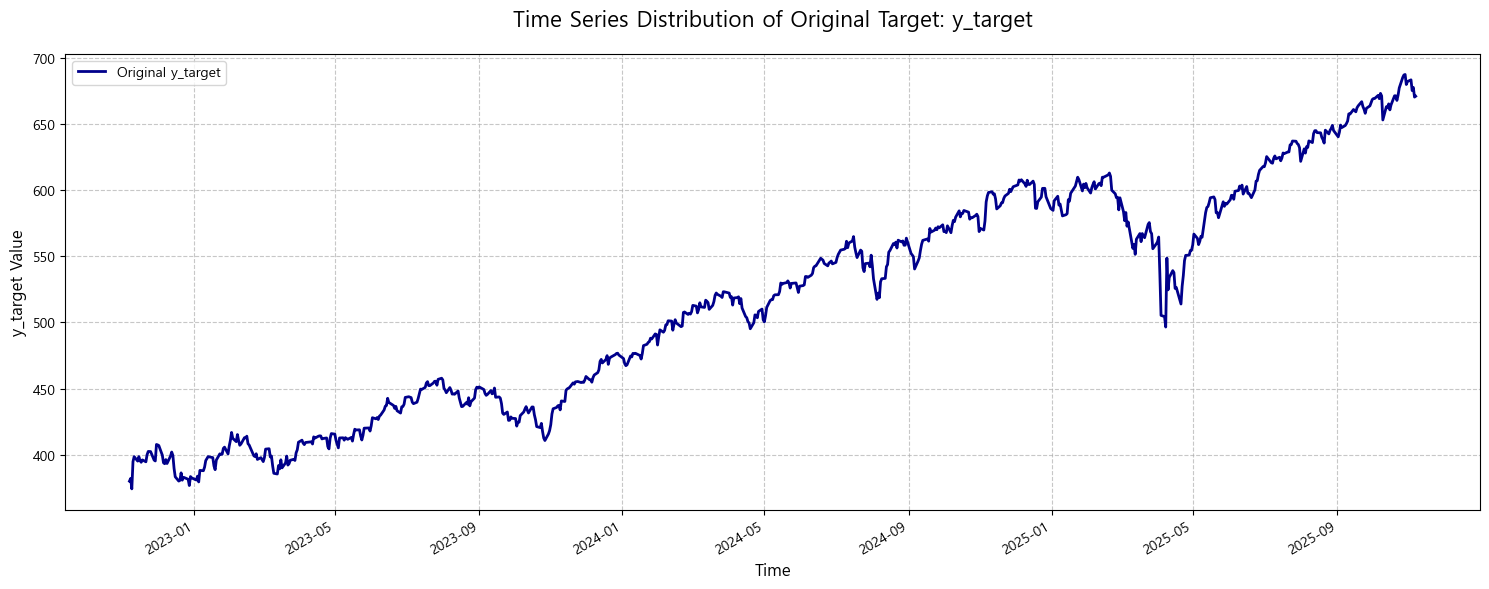

In [14]:
# ⭐️ 원본 타겟 변수 (y_target) 시계열 꺾은선 그래프 그리기 ⭐️
plt.figure(figsize=(15, 6))

# 원본 타겟 변수 플롯
df['y_target'].plot(linewidth=2, color='darkblue')

plt.title('Time Series Distribution of Original Target: y_target', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('y_target Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Original y_target'], loc='upper left')

plt.tight_layout()
plt.show()

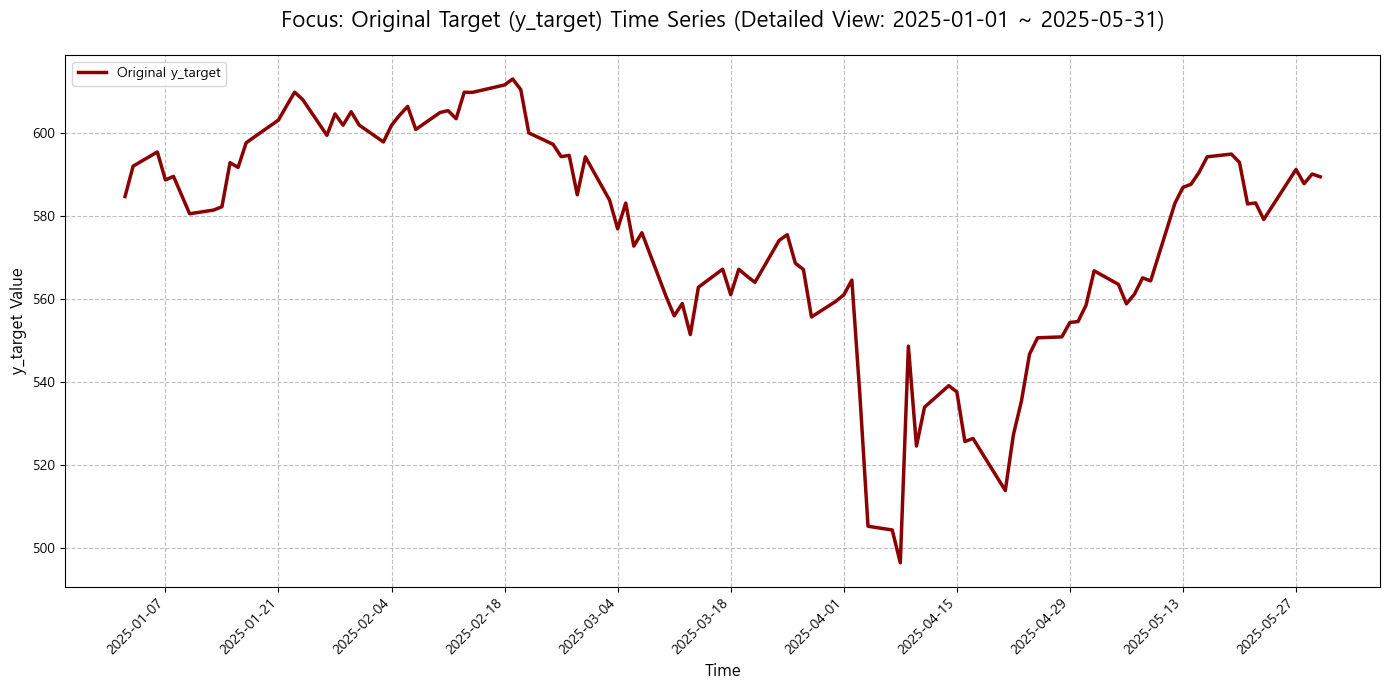

In [15]:
import matplotlib.dates as mdates

# 1. 원하는 기간으로 데이터 필터링
start_date = '2025-01-01'
end_date = '2025-05-31'
df_filtered = df.loc[start_date:end_date]


# ⭐️ y_target 시계열 꺾은선 그래프 그리기 - 주 단위 포맷 ⭐️
plt.figure(figsize=(14, 7))

df_filtered['y_target'].plot(linewidth=2.5, color='darkred')

plt.title(f'Focus: Original Target (y_target) Time Series (Detailed View: {start_date} ~ {end_date})', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('y_target Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Original y_target'], loc='upper left')

# X축 주(週) 단위 설정 및 포맷 지정
ax = plt.gca()
# 주(週)마다 틱 표시
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# 월(月)을 라벨로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# 서브 틱(보조 틱)을 일 단위로 표시 (데이터 포인트가 많다면 유용)
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45, ha='right') # 라벨이 겹치지 않도록 회전
plt.tight_layout()
plt.show()

- 2025년 4월 2일 \:도널드 트럼프 미국 대통령이 시작한 관세 부과와 그로 인한 무역 전쟁의 공포가 주가 하락의 직접적인 원인

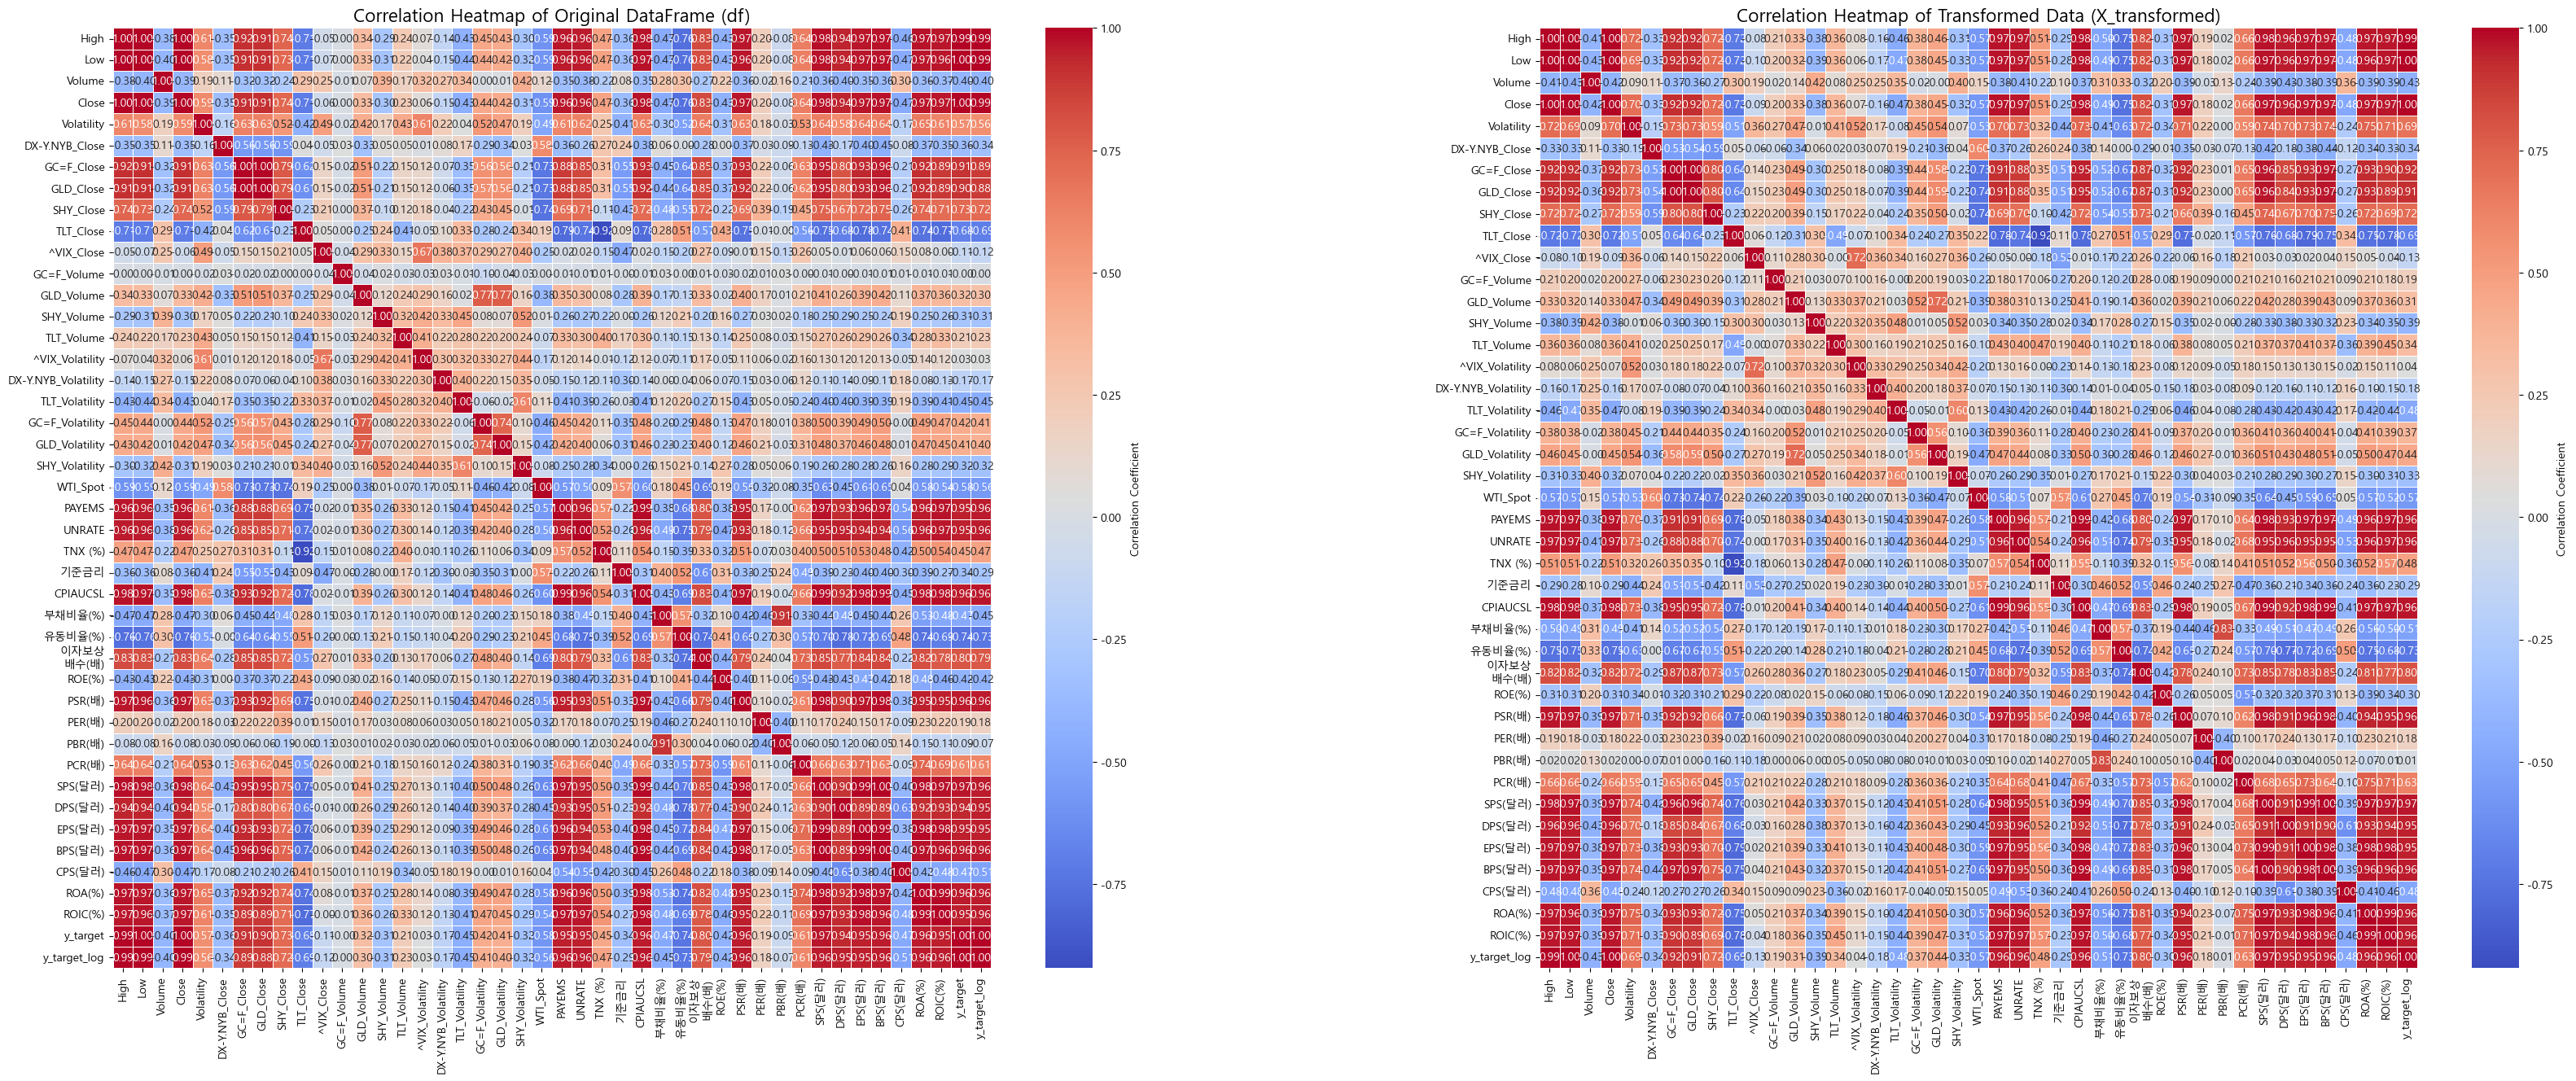

In [16]:
# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. 상관 관계 행렬 계산
correlation_matrix_df = numeric_df.corr()
correlation_matrix_X_transformed = numeric_X_transformed.corr()

# 3. Matplotlib의 subplots을 사용하여 1행 2열의 Figure와 Axes 생성
# figsize는 두 개의 히트맵을 수용할 수 있도록 가로 크기를 충분히 크게 설정합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 15)) # 1행 2열, 전체 그림 크기 설정
plt.subplots_adjust(wspace=0.3) # 두 서브플롯 사이의 가로 간격 조정

# --- 첫 번째 히트맵 (df) ---
sns.heatmap(
    correlation_matrix_df,
    ax=ax1,              # 첫 번째 서브플롯(ax1)에 할당
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
ax1.set_title('Correlation Heatmap of Original DataFrame (df)', fontsize=16)

# --- 두 번째 히트맵 (X_transformed) ---
sns.heatmap(
    correlation_matrix_X_transformed,
    ax=ax2,              # 두 번째 서브플롯(ax2)에 할당
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
ax2.set_title('Correlation Heatmap of Transformed Data (X_transformed)', fontsize=16)

plt.show()

c:\Users\samsung\miniconda3\envs\donga7\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\samsung\miniconda3\envs\donga7\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\samsung\miniconda3\envs\donga7\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\samsung\miniconda3\envs\donga7\Lib\site-packages\seaborn\categorical.py:632: FutureWarning

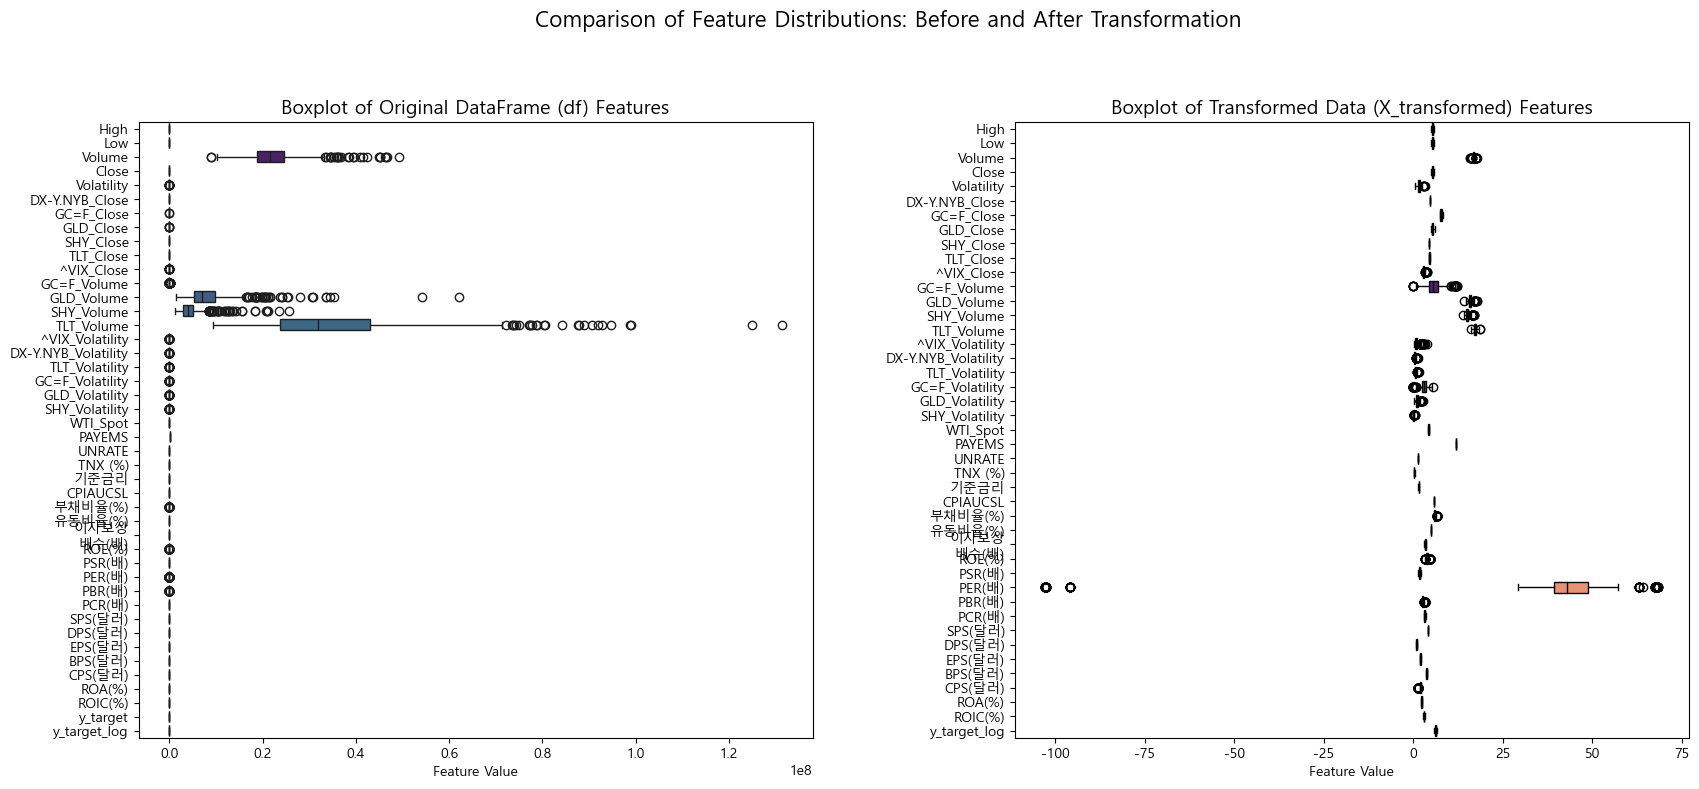

In [17]:
# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. Matplotlib의 subplots을 사용하여 1행 2열의 Figure와 Axes 생성
# df는 컬럼 수가 많다고 가정하고 가로 크기(20)를 더 크게 설정했습니다.
# X_transformed의 컬럼 수에 따라 크기를 조정해야 합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.3) # 두 서브플롯 사이의 가로 간격 조정

# --- 첫 번째 박스플롯 (df) ---
sns.boxplot(
    data=numeric_df,
    ax=ax1,              # 첫 번째 서브플롯(ax1)에 할당
    orient='h',          # 박스플롯을 수평으로 표시 (가독성 향상)
    palette='viridis'    # 색상 팔레트 설정
)
ax1.set_title('Boxplot of Original DataFrame (df) Features', fontsize=14)
ax1.set_xlabel('Feature Value') # x축 레이블 설정

# --- 두 번째 박스플롯 (X_transformed) ---
sns.boxplot(
    data=numeric_X_transformed,
    ax=ax2,              # 두 번째 서브플롯(ax2)에 할당
    orient='h',          # 박스플롯을 수평으로 표시
    palette='magma'      # 다른 색상 팔레트 설정
)
ax2.set_title('Boxplot of Transformed Data (X_transformed) Features', fontsize=14)
ax2.set_xlabel('Feature Value') # x축 레이블 설정

# 전체 Figure의 제목을 추가할 수도 있습니다.
fig.suptitle('Comparison of Feature Distributions: Before and After Transformation', fontsize=16, y=1.02)

plt.show()

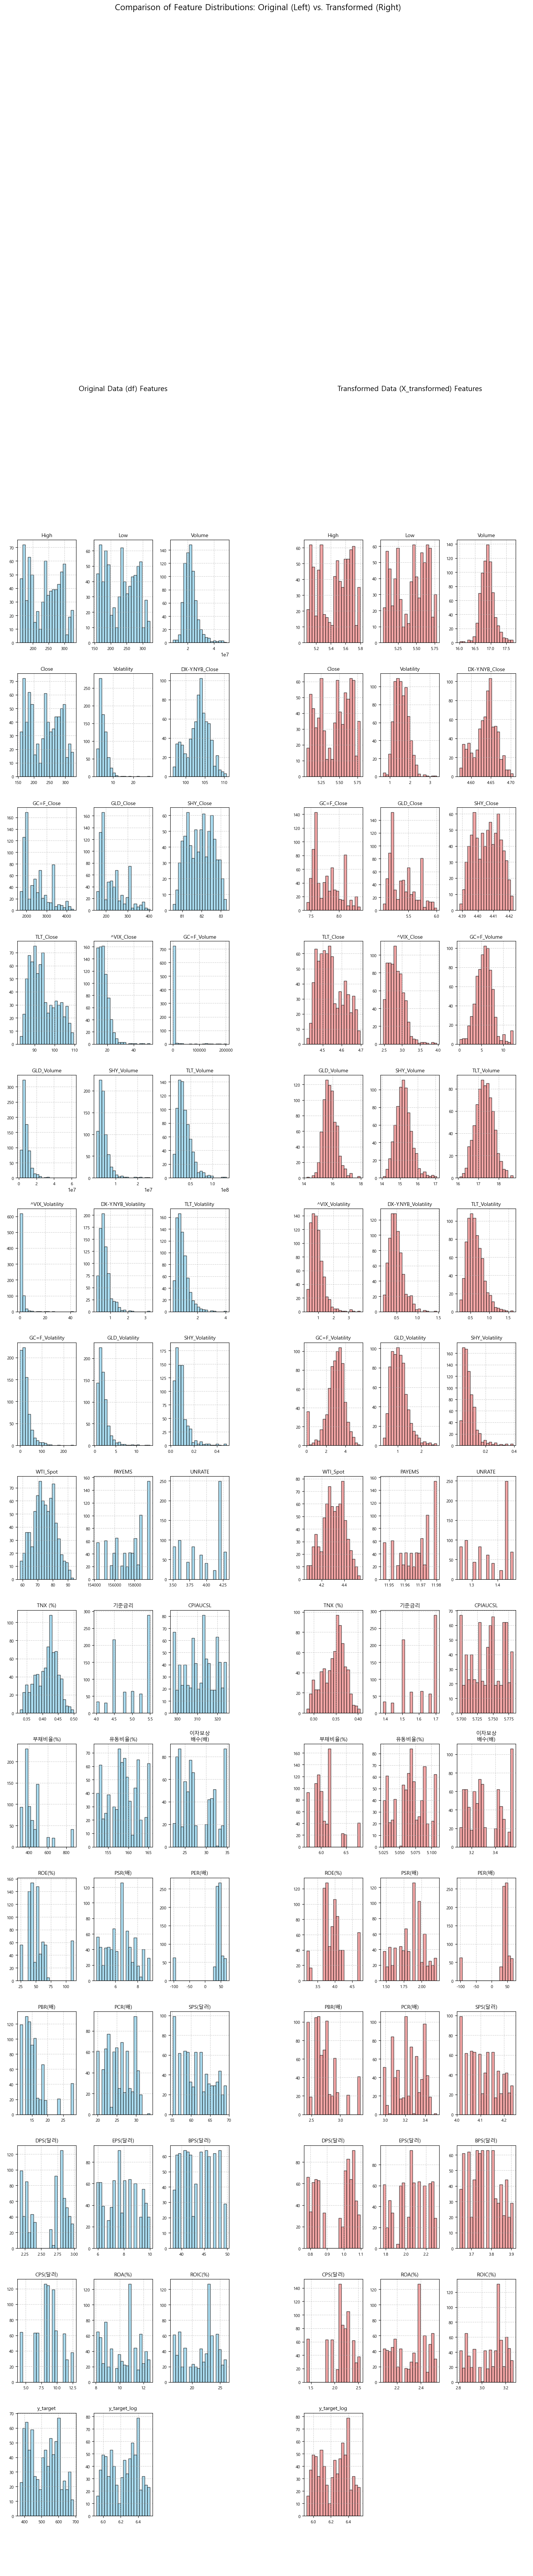

In [18]:
import math
from matplotlib.gridspec import GridSpec

# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. 각 데이터프레임의 서브플롯 그리드 크기 계산
MAX_COLS = 3

# df
df_cols = numeric_df.columns
df_rows = math.ceil(len(df_cols) / MAX_COLS)
df_total_plots = len(df_cols)

# X_transformed
xt_cols = numeric_X_transformed.columns
xt_rows = math.ceil(len(xt_cols) / MAX_COLS)
xt_total_plots = len(xt_cols)

# 3. Figure 및 GridSpec 설정
fig = plt.figure(figsize=(18, 5 * max(df_rows, xt_rows)))
fig.suptitle('Comparison of Feature Distributions: Original (Left) vs. Transformed (Right)', fontsize=16, y=1.02)

# 전체 Figure를 1행 2열로 나누는 GridSpec 생성
gs_main = GridSpec(1, 2, figure=fig, wspace=0.2)

# --- A. 왼쪽 영역 (df) 설정 ---
ax_left = fig.add_subplot(gs_main[0, 0])
ax_left.axis('off') # 메인 영역 자체의 축은 숨김
ax_left.set_title('Original Data (df) Features', fontsize=14, pad=15)

# df의 히스토그램을 위한 내부 GridSpec 생성
gs_df = GridSpec(df_rows, MAX_COLS, figure=fig, wspace=0.3, hspace=0.3)

# ⭐️⭐️⭐️ 오류 수정: gs_main[0, 0].get_position()에 'figure=fig' 인수를 추가 ⭐️⭐️⭐️
main_left_pos = gs_main[0, 0].get_position(figure=fig)

gs_df.update(left=main_left_pos.x0 + 0.02,
             right=main_left_pos.x1 - 0.02,
             top=main_left_pos.y1 - 0.05,
             bottom=main_left_pos.y0 + 0.02)

# df 히스토그램 그리기
for i, col in enumerate(df_cols):
    row_idx = i // MAX_COLS
    col_idx = i % MAX_COLS

    # GridSpec에서 서브플롯 영역 가져오기
    ax = fig.add_subplot(gs_df[row_idx, col_idx])

    # 히스토그램 그리기
    ax.hist(numeric_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)


# --- B. 오른쪽 영역 (X_transformed) 설정 ---
ax_right = fig.add_subplot(gs_main[0, 1])
ax_right.axis('off') # 메인 영역 자체의 축은 숨김
ax_right.set_title('Transformed Data (X_transformed) Features', fontsize=14, pad=15)

# X_transformed의 히스토그램을 위한 내부 GridSpec 생성
gs_xt = GridSpec(xt_rows, MAX_COLS, figure=fig, wspace=0.3, hspace=0.3)

# ⭐️⭐️⭐️ 오류 수정: gs_main[0, 1].get_position()에 'figure=fig' 인수를 추가 ⭐️⭐️⭐️
main_right_pos = gs_main[0, 1].get_position(figure=fig)

gs_xt.update(left=main_right_pos.x0 + 0.02,
             right=main_right_pos.x1 - 0.02,
             top=main_right_pos.y1 - 0.05,
             bottom=main_right_pos.y0 + 0.02)


# X_transformed 히스토그램 그리기
for i, col in enumerate(xt_cols):
    row_idx = i // MAX_COLS
    col_idx = i % MAX_COLS

    ax = fig.add_subplot(gs_xt[row_idx, col_idx])

    # 히스토그램 그리기
    ax.hist(numeric_X_transformed[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

    # 남는 빈 공간의 축 숨기기 (df와 xt의 컬럼 수가 다를 경우)
    if i >= xt_total_plots:
        ax.axis('off')

plt.show()